In [1]:
import pandas as pd
import numpy as np 
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
##loading english model for spacy
NER=spacy.load("en_core_web_sm")

## Load Books

In [3]:
import os

all_books=[b for b in os.scandir('Data') if '.txt' in b.name]

In [4]:
all_books

[<DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>]

In [5]:
book = all_books[0]
book_text = open(book).read()
book_doc=NER(book_text)

In [6]:
##Visualise identified entities (first 2000 entries)
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load Character Names

In [7]:
##Read characters
character_df=pd.read_csv('./Extracting names from wiki/characters.csv')

In [8]:
character_df

Unnamed: 0                                  book               character
0              0   Category:Baptism of Fire characters                  Adalia
1              1   Category:Baptism of Fire characters                   Adela
2              2   Category:Baptism of Fire characters           Aen Saevherne
3              3   Category:Baptism of Fire characters                Aevenien
4              4   Category:Baptism of Fire characters                  Aglaïs
...          ...                                   ...                     ...
1269        1269  Category:Time of Contempt characters        Yanna of Murivel
1270        1270  Category:Time of Contempt characters           Yarpen Zigrin
1271        1271  Category:Time of Contempt characters  Yennefer of Vengerberg
1272        1272  Category:Time of Contempt characters         Yiolenta Suarez
1273        1273  Category:Time of Contempt characters                   Zyvik

[1274 rows x 3 columns]

In [9]:
## Remove brackets and text within Brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","",x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ',1)[0])

In [10]:
pd.set_option('display.max_rows', None)
character_df

Unnamed: 0                                               book  \
0              0                Category:Baptism of Fire characters   
1              1                Category:Baptism of Fire characters   
2              2                Category:Baptism of Fire characters   
3              3                Category:Baptism of Fire characters   
4              4                Category:Baptism of Fire characters   
5              5                Category:Baptism of Fire characters   
6              6                Category:Baptism of Fire characters   
7              7                Category:Baptism of Fire characters   
8              8                Category:Baptism of Fire characters   
9              9                Category:Baptism of Fire characters   
10            10                Category:Baptism of Fire characters   
11            11                Category:Baptism of Fire characters   
12            12                Category:Baptism of Fire characters   
13            13                Category:Baptism of Fire characters   
14            14                Category:Baptism of Fire characters   
15            15                Category:Baptism of Fire characters   
16            16                Category:Baptism of Fire characters   
17            17                Category:Baptism of Fire characters   
18            18                Category:Baptism of Fire characters   
19            19                Category:Baptism of Fire characters   
20            20                Category:Baptism of Fire characters   
21            21                Category:Baptism of Fire characters   
22            22                Category:Baptism of Fire characters   
23            23                Category:Baptism of Fire characters   
24            24                Category:Baptism of Fire characters   
25            25                Category:Baptism of Fire characters   
26            26                Category:Baptism of Fire characters   
27            27                Category:Baptism of Fire characters   
28            28                Category:Baptism of Fire characters   
29            29                Category:Baptism of Fire characters   
30            30                Category:Baptism of Fire characters   
31            31                Category:Baptism of Fire characters   
32            32                Category:Baptism of Fire characters   
33            33                Category:Baptism of Fire characters   
34            34                Category:Baptism of Fire characters   
35            35                Category:Baptism of Fire characters   
36            36                Category:Baptism of Fire characters   
37            37                Category:Baptism of Fire characters   
38            38                Category:Baptism of Fire characters   
39            39                Category:Baptism of Fire characters   
40            40                Category:Baptism of Fire characters   
41            41                Category:Baptism of Fire characters   
42            42                Category:Baptism of Fire characters   
43            43                Category:Baptism of Fire characters   
44            44                Category:Baptism of Fire characters   
45            45                Category:Baptism of Fire characters   
46            46                Category:Baptism of Fire characters   
47            47                Category:Baptism of Fire characters   
48            48                Category:Baptism of Fire characters   
49            49                Category:Baptism of Fire characters   
50            50                Category:Baptism of Fire characters   
51            51                Category:Baptism of Fire characters   
52            52                Category:Baptism of Fire characters   
53            53                Category:Baptism of Fire characters   
54            54                Category:Baptism of Fire characters   
55            55              

## Get named entitiy list per sentence

In [11]:
sent_entity_df=[]
# loop through sentences , store named entity list for each sentence
for sent in book_doc.sents:
    entity_list=[ent.text for ent in sent.ents]
    sent_entity_df.append({'sentence':sent, 'entities':entity_list})
    
sent_entity_df=pd.DataFrame(sent_entity_df)      

In [12]:
sent_entity_df

sentence  \
0      (ï»¿The, Limits, of, the, Possible, \n, I, \n,...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2      (He, 's, done, for, ., ", \n, The, townsfolk, ...   
3      (A, fat, man, dressed, in, a, yellow, smock, \...   
4      (\n, ", We, have, to, wait, a, bit, longer, ,,...   
5      (\n, ", Why, wait, ?, ", snorted, pimply, ,, "...   
6      (Anyone, goes, down, there, ,, that, 's, the, ...   
7      (Have, you, forgotten, how, many, \n, have, di...   
8      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
9              (murmured, the, fat, man, uncertainly, .)   
10     (\n, ", An, agreement, you, made, with, a, liv...   
11     (", He, is, now, dead, ,, as, surely, as, the,...   
12     (It, was, plain, from, the, beginning, that, h...   
13     (He, did, n't, even, take, a, mirror, with, hi...   
14     (", \n, ", At, least, we, 've, saved, some, co...   
15                   (You, might, as, well, go, home, .)   
16     (As, far, as, the, sorcerer, 's, horse, and, b...   
17     (well, it, \n, would, be, a, shame, if, they, ...   
18     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
19                           (Let, 's, take, a, look, .)   
20     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
21     (Do, n't, get, in, the, way, unless, you, want...   
22     (\n, ", A, fine, old, mare, ,, ", repeated, th...   
23     (\n, ", Leave, the, horse, alone, ,, my, darli...   
24     (", \n, The, butcher, slowly, turned, around, ...   
25     (\n, The, stranger, had, thick, curly, brown, ...   
26                             (He, had, no, weapons, .)   
27     (\n, 3, \n, ", Step, away, from, the, horse, ,...   
28                          (", What, have, we, here, ?)   
29     (A, horse, and, saddlebags, belonging, to, ano...   
30     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
31     (The, butcher, gave, a, nod, and, signalled, t...   
32     (Both, carried, heavy, clubs, ,, like, those, ...   
33     (\n, ", Who, are, you, ?, ", demanded, the, pi...   
34                (", \n, ", You, carry, no, weapons, .)   
35     (", \n, ", That, 's, true, ,, ", the, stranger...   
36     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
37     (The, other, two, men, approached, ,, brandish...   
38     (\n, ", I, do, n't, carry, weapons, ,, ", resp...   
39     (The, crowd, quickly, parted, ,, retreated, th...   
40     (\n, The, girls, smiled, ,, flashing, their, t...   
41     (They, had, blue, stripes, tattooed, from, the...   
42     (Lynx, pelt, clad, their, strong, muscles, fro...   
43     (From, behind, the, mail, -, clad, shoulder, o...   
44     (\n, Pimply, got, down, on, one, knee, and, sl...   
45     (\n, From, the, hole, in, ruins, came, a, rumb...   
46     (Following, the, hands, ,, a, white, head, app...   
47                   (A, murmur, escaped, the, crowd, .)   
48     (\n, The, alabaster, -, haired, man, straighte...   
49     (Holding, the, beast, by, its, long, lizard, -...   
50     (The, burgrave, jumped, backwards, and, trippe...   
51     (Its, slashed, throat, ,, once, carmine, ,, wa...   
52                  (Its, sunken, eyes, were, glassy, .)   
53     (\n, ", Here, 's, the, basilisk, ,, ", said, t...   
54     (I, will, check, them, ,, I, 'm, warning, you, .)   
55     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
56     (The, white, -, haired, man, looked, around, a...   
57     (He, also, noticed, the, man, in, the, brown, ...   
58     (\n, ", It, 's, always, the, same, ,, ", he, s...   
59     (You, people, never, change, ,, damn, you, to,...   
60     (The, men, armed, with, the, clubs, had, long,...   
61     (", Your, things, have, not, been, disturbed, ...   
62     (At, the, sight, of, his, smile, ,, which, blo...   
63     (", And, that, is, why, ,, brother, ,, you, ha...   
64                                    (Go, in, peace, .)   
65                                 (But, go, quickly, .)   
66     (", \n, Pimply, ,, ba

In [13]:
## Function to filter out non-character entities
def filter_entity(ent_list,character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]
    

In [14]:
sent_entity_df['character_entities']=sent_entity_df['entities'].apply(lambda x:filter_entity(x, character_df))
## Filter out entities that do not have any character entities e.g []
sent_entity_df_filtered=sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
sent_entity_df_filtered.head(10)

sentence  \
89   (Is, there, anything, keeping, you, in, this, ...   
95   (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
98   (And, you, said, that, as, if, you, were, sayi...   
102  (", \n, Geralt, took, off, a, glove, and, shoo...   
130  (\n, ", I, forgot, ,, ", Three, Jackdaws, wink...   
141  (Geralt, loosened, his, belt, ,, removed, his,...   
146  (\n, ", Do, the, girls, speak, the, common, la...   
149  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
158  (Yet, there, is, a, certain, principal, underl...   
185  (Let, 's, say, a, fierce, dragon, destroys, .....   

                       entities character_entities  
89   [Geralt of Rivia, Perfect]  [Geralt of Rivia]  
95              [Borch, Geralt]           [Geralt]  
98                     [Geralt]           [Geralt]  
102                    [Geralt]           [Geralt]  
130    [Three Jackdaws, Geralt]           [Geralt]  
141                    [Geralt]           [Geralt]  
146                    [Geralt]           [Geralt]  
149                    [Geralt]           [Geralt]  
158                    [Geralt]           [Geralt]  
185                    [Geralt]           [Geralt]

In [15]:
## Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                               for item in x])

C:\Users\Shlok Sheth\AppData\Local\Temp\ipykernel_16272\84384631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [16]:
pd.reset_option('^display.',silent=True)
sent_entity_df_filtered

sentence  \
89     (Is, there, anything, keeping, you, in, this, ...   
95     (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
98     (And, you, said, that, as, if, you, were, sayi...   
102    (", \n, Geralt, took, off, a, glove, and, shoo...   
130    (\n, ", I, forgot, ,, ", Three, Jackdaws, wink...   
...                                                  ...   
10819  (He, only, saw, black, -, gloved, hands, squee...   
10821                                 (Oh, ,, Geralt, !)   
10826                            (Say, it, ,, Geralt, !)   
10828  (Say, it, !, ", \n, ", Forever, ,, Ciri, ., ",...   
10835  (With, good, reason, :, \n, ", You, 're, more,...   

                         entities character_entities  
89     [Geralt of Rivia, Perfect]           [Geralt]  
95                [Borch, Geralt]           [Geralt]  
98                       [Geralt]           [Geralt]  
102                      [Geralt]           [Geralt]  
130      [Three Jackdaws, Geralt]           [Geralt]  
...                           ...                ...  
10819                      [Ciri]             [Ciri]  
10821                    [Geralt]           [Geralt]  
10826                    [Geralt]           [Geralt]  
10828              [Ciri, Geralt]     [Ciri, Geralt]  
10835                      [Ciri]             [Ciri]  

[1509 rows x 3 columns]

## Create Relationships

In [17]:
window_size=5
relationships=[]

for i in range(sent_entity_df_filtered.index[-1]):
    end_i=min(i+5,sent_entity_df_filtered.index[-1])
    char_list=sum((sent_entity_df_filtered.loc[i: end_i].character_entities),[])
    ## Remove same names (Don't want Geralt's relationship with Geralt)
    char_unique = [char_list[i] for i in range(len(char_list))
                   if (i==0) or char_list[i]!= char_list[i-1]]
    
    if len(char_unique)>1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relationships.append({"source":a, "target":b})

In [18]:
relationship_df=pd.DataFrame(relationships)

In [19]:
pd.set_option('display.max_rows',None)
relationship_df

source             target
0              Niedamir             Geralt
1              Niedamir             Geralt
2              Niedamir             Geralt
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6              Niedamir             Geralt
7              Niedamir             Geralt
8                Geralt           Niedamir
9                Geralt           Niedamir
10             Niedamir             Geralt
11             Niedamir             Geralt
12             Niedamir             Geralt
13             Niedamir             Geralt
14               Geralt               Eyck
15               Geralt               Eyck
16               Geralt               Eyck
17                 Eyck             Geralt
18                 Eyck             Geralt
19                 Eyck             Geralt
20               Geralt               Eyck
21               Geralt               Eyck
22               Geralt               Eyck
23             Niedamir             Geralt
24             Niedamir             Geralt
25             Niedamir             Geralt
26             Niedamir             Geralt
27             Niedamir             Geralt
28               Geralt         Dorregaray
29               Geralt         Dorregaray
30           Dorregaray           Yennefer
31             Yennefer         Dorregaray
32             Yennefer         Dorregaray
33             Yennefer         Dorregaray
34             Yennefer         Dorregaray
35             Yennefer         Dorregaray
36           Dorregaray             Geralt
37             Yennefer         Dorregaray
38           Dorregaray             Geralt
39               Boholt           Niedamir
40               Boholt           Niedamir
41               Boholt           Niedamir
42               Boholt           Niedamir
43               Boholt           Niedamir
44               Geralt             Yarpen
45               Geralt             Yarpen
46               Geralt             Yarpen
47               Yarpen           Niedamir
48               Yarpen           Niedamir
49         Gyllenstiern             Geralt
50         Gyllenstiern             Geralt
51         Gyllenstiern             Geralt
52         Gyllenstiern             Geralt
53               Geralt           Niedamir
54         Gyllenstiern             Geralt
55               Geralt           Niedamir
56         Gyllenstiern             Geralt
57               Geralt           Niedamir
58               Geralt             Kennet
59               Geralt             Kennet
60               Kennet             Boholt
61               Kennet             Boholt
62               Kennet             Boholt
63               Kennet             Boholt
64               Boholt             Geralt
65               Geralt             Boholt
66               Boholt             Geralt
67               Geralt             Boholt
68               Boholt             Geralt
69               Boholt             Geralt
70               Boholt             Geralt
71               Boholt             Geralt
72               Geralt             Yarpen
73               Boholt             Geralt
74               Geralt             Yarpen
75               Geralt             Yarpen
76               Geralt             Yarpen
77               Geralt             Yarpen
78               Yarpen         Dorregaray
79               Yarpen         Dorregaray
80           Dorregaray           Yennefer
81               Yarpen         Dorregaray
82           Dorregaray           Yennefer
83               Yarpen         Dorregaray
84           Dorregaray           Yennefer
85           Dorregaray           Yennefer
86           Dorregaray           Yennefer
87             Yennefer           Niedamir
88             Niedamir       Gyllenstiern
89             Yennefer           Niedamir
90             Niedamir       Gyllenstiern
91         Gyllenstiern           Yennefer
92             Nie

In [20]:
# Sort cases with a->b and b->a
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [21]:
relationship_df.head(10)

source      target  value
0    Niedamir      Geralt     16
1      Geralt    Niedamir     39
2      Geralt        Eyck     15
3        Eyck      Geralt     15
4      Geralt  Dorregaray     13
5  Dorregaray    Yennefer     25
6    Yennefer  Dorregaray     31
7  Dorregaray      Geralt     10
8      Boholt    Niedamir     12
9      Geralt      Yarpen     12

## Graph analysis and visualization

In [22]:
# Create a graph from pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                            source="source",
                            target="target",
                            edge_attr="value",
                            create_using = nx.Graph())

### Graph Visualization - NetworkX

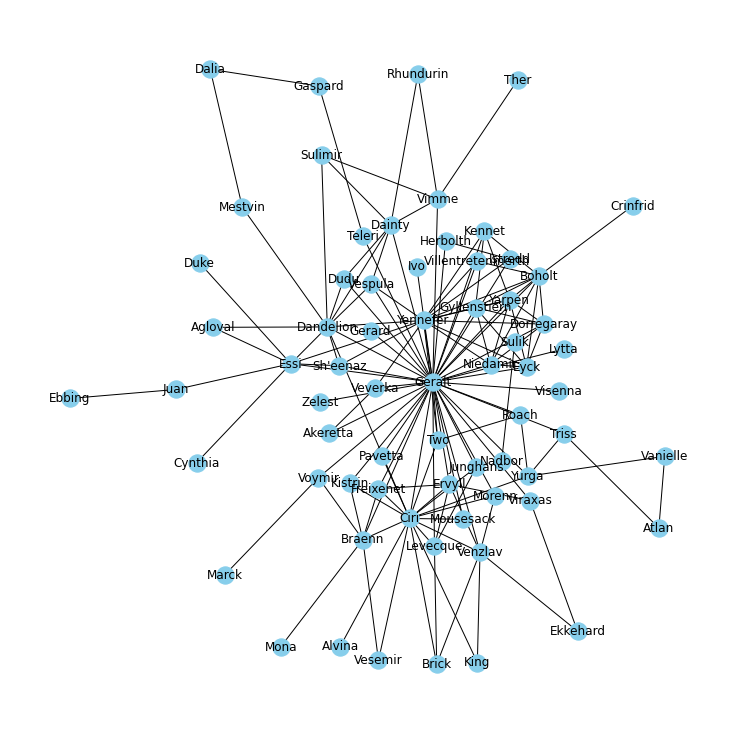

In [25]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show() 

## Graph visualization - Pyvis

In [34]:
from pyvis.network import Network
net = Network(notebook = True , width="1000px", height="1000px", bgcolor="#222222", font_color="skyblue")

node_degree = dict(G.degree)
#Setting up node size attribute

nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('witcher.html')